# Steps of this classification  Model
 **Building A data pipeline**

 **Preprocessing Images for DL**

 **Creating A Deep NN Classifier**

 **Evaluating Model Performance**
 
 **Saving the model for deployment**

 # TO_Do
 For deep learning models:

#### Data Augmentation: Deep learning models often benefit from large amounts of data, so data augmentation is crucial to artificially increase the size of your dataset.
#### Model Architecture: Deep learning models typically involve neural networks with multiple layers. Experimenting with different architectures, such as CNNs (Convolutional Neural Networks) for image data or RNNs (Recurrent Neural Networks) for sequential data, can significantly impact performance.
#### Hyperparameter Tuning: Deep learning models have various hyperparameters that need to be optimized, such as the number of layers, learning rate, batch size, etc.
#### Regularization: Techniques like dropout, weight decay, and batch normalization are commonly used to prevent overfitting in deep learning models.
#### Ensemble Learning: Ensemble methods, such as stacking multiple neural networks or combining them with other types of models, can be particularly effective in deep learning.



# 1 set up and load data

## 1.1 install dependencies and set up

In [1]:
#!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                      Version
---------------------------- --------------
absl-py                      2.1.0
aiohttp                      3.9.3
aiosignal                    1.2.0
anyio                        4.3.0
appnope                      0.1.2
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.3.0
asttokens                    2.0.5
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        23.1.0
Babel                        2.15.0
beautifulsoup4               4.12.3
bleach                       6.1.0
blinker                      1.6.2
Brotli                       1.0.9
cachetools                   5.3.3
certifi                      2024.2.2
cffi                         1.16.0
charset-normalizer           2.0.4
click                        8.1.7
comm                         0.2.1
contextlib2                  21.6.0
contourpy                    1.2.1
cryptography                 41.0.

In [1]:
import tensorflow as tf
import os

In [2]:
#Avoid OOM errors by setting GPU memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

## 1.2 Remove dodgy Images

In [3]:
import cv2
import imghdr

/var/folders/yn/jzzqv3s17t5_glr9g2gqxmyh0000gn/T/ipykernel_23395/4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = '/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/plant_disease_classification_dataset_rupa'

In [5]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [6]:
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [20]:
os.listdir(data_dir)

['nematode disease',
 'potassium deficiency',
 'phosphorus deficiency',
 'fungal disease',
 'Magnesium Deficiency',
 'parasitic disease',
 'Iron Deficiency',
 'viral disease',
 'nitrogen deficiency',
 'calcium deficiency',
 'no_disease',
 'sulfur deficiency',
 'bacterial disease']

In [21]:
for image_class in os.listdir(data_dir):
    print(image_class)

nematode disease
potassium deficiency
phosphorus deficiency
fungal disease
Magnesium Deficiency
parasitic disease
Iron Deficiency
viral disease
nitrogen deficiency
calcium deficiency
no_disease
sulfur deficiency
bacterial disease


In [22]:
os.listdir(os.path.join(data_dir, "Magnesium Deficiency"))

['Bean20Mg_0.jpg',
 'bdd9d83c1dfc964d0d2a692f05c47c0e.jpg',
 'thy9568_M.jpg',
 'image22.jpeg',
 'magnesium-deficiency-marijuana-diagram.jpg',
 'image18.jpeg',
 '12755c67-ad83-493a-9d3e-f799735b799e-ab0450b.jpg',
 '1200px-Frangula_alnus_with_magnesium_deficiency.jpg',
 'image43.jpeg',
 'Grapes-Iron-Deficiency-scaled.jpg',
 'maxresdefault2.jpg',
 'image42.jpeg',
 'd8716f8b-49ce-4290-b3b1-e2116dc65da6-da23709.jpg',
 'Magnesium-Deficient-Plants.jpg',
 'Magnesium20Deficiency_1.jpg',
 'maxresdefault3.jpg',
 'magnesium-deficiency-scaled.jpg',
 'how-to-recognize-and-treat-magnesium-deficiency-in-cannabis-plants-314876-960x540.jpg',
 'avocado20mg203.jpg',
 'AdobeStock_326321757-scaled.jpeg',
 'Magnesium-deficiency-SensiSeeds-6-scaled.jpg',
 'image23.jpeg',
 'image28.jpeg',
 'maxresdefault.jpg',
 'Signs-of-nutrient-deficiency-1.png',
 'image45.jpeg',
 'early-signs-of-nutrient-defeciency-in-cannabis-plant.jpg',
 'Mg_severe_def.jpg',
 'image32.jpeg',
 'Nutrient-deficiency-symptoms-noted-during-pla

In [ ]:
#to remove .DS_Store
''' 
for item in os.listdir(data_dir):
    # Construct the full path of the item
    item_path = os.path.join(data_dir, item)
    
    # Check if the item is a file and if its name is .DS_Store
    if os.path.isfile(item_path) and item == ".DS_Store":
        # Remove the file
        os.remove(item_path)
'''

In [10]:
img = cv2.imread(os.path.join(data_dir, "Magnesium Deficiency",'image23.jpeg' ))

In [11]:
type(img)

numpy.ndarray

In [12]:
img.shape

(152, 331, 3)

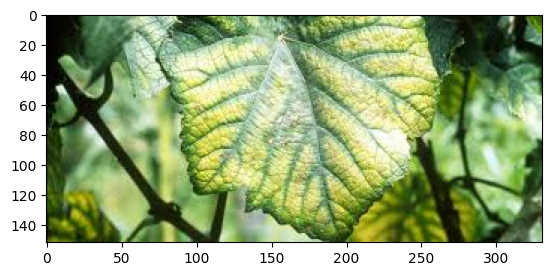

In [13]:
import matplotlib.pyplot as plt
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [23]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))


libpng warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
libpng warning: iCCP: known incorrect sRGB profile


## 1.3 Load Data

In [21]:
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [24]:
import numpy as np

* before augmantatio dataset had 1615 files

In [25]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1617 files belonging to 13 classes.


In [26]:
data_iterator = data.as_numpy_iterator()

In [27]:
#get another batch from itearator
batch = data_iterator.next()

In [28]:
#images representes as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [29]:

batch[1]

array([ 4, 12,  2,  3, 11, 12,  2,  8,  4,  3,  7,  9,  9,  9,  7, 12,  7,
        0,  2,  9,  1, 10,  7,  9,  2, 12,  8,  5, 12,  3,  9, 12],
      dtype=int32)

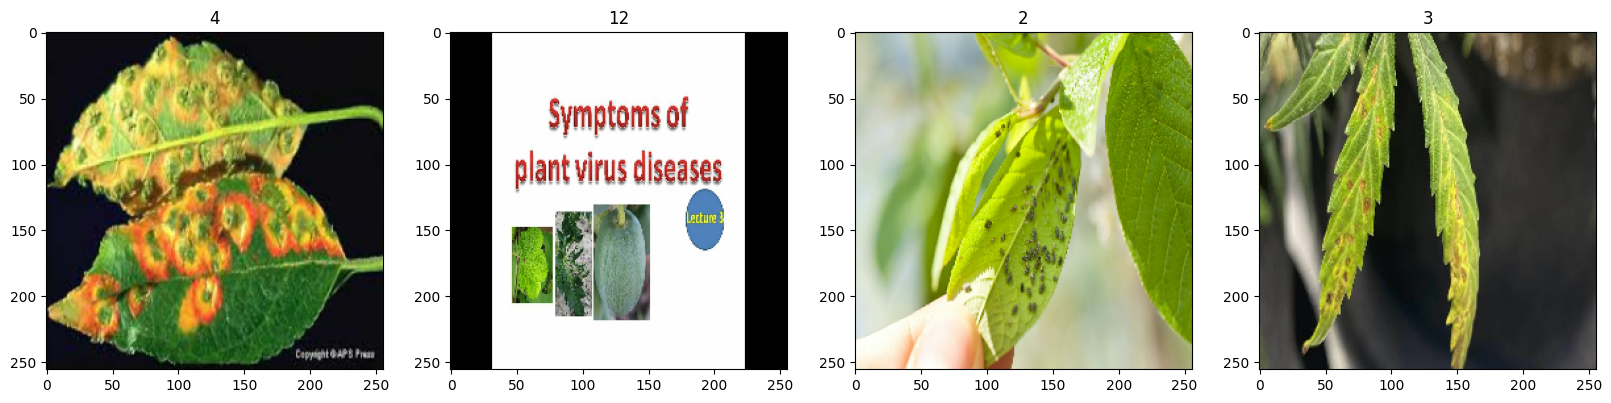

In [31]:

fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 2 Preprocess Data

In [32]:
scaled = batch[0]/255

In [33]:
scaled.min()

0.0

In [34]:
scaled.max()

1.0

## 2.1 Scale Data

In [35]:
data = data.map(lambda x,y: (x/255, y))

In [36]:
scaled_iterator = data.as_numpy_iterator()

In [37]:
batch = scaled_iterator.next()

2024-05-09 13:01:40.343902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 13:01:40.358095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 13:01:40.606669: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


2024-05-09 13:01:40.800892: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 13:01:40.866804: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [38]:
batch[0].max()

1.0

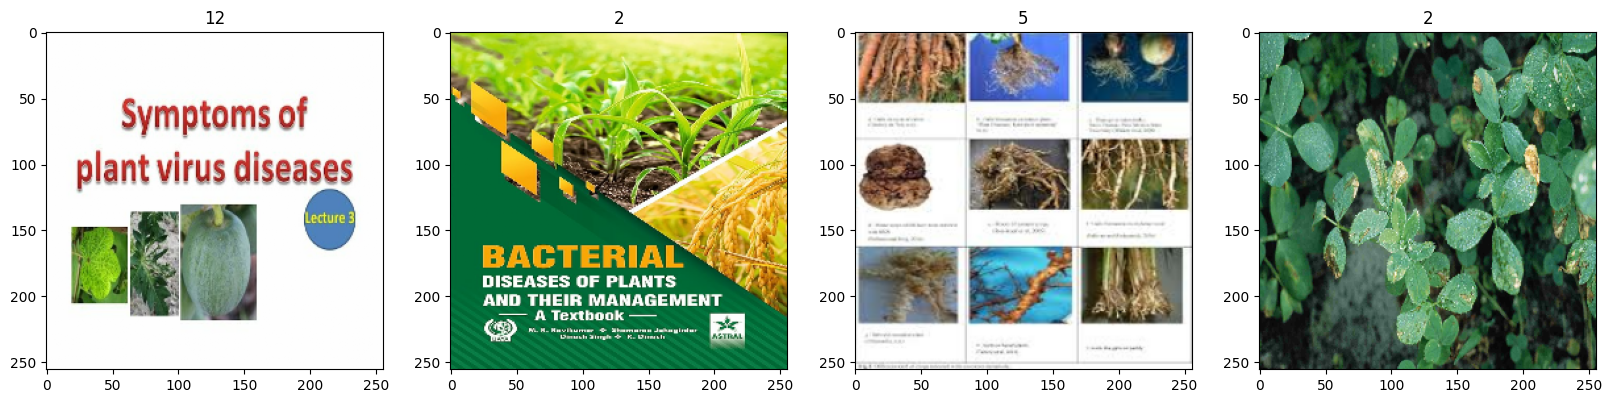

In [40]:

fig, ax = plt.subplots(ncols=4, figsize= (20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

## 2.2 Split data

In [41]:
len(data)

51

In [42]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [43]:
print(train_size)
print(val_size)
print(test_size)

35
11
5


In [44]:
train_size + val_size + test_size

51

In [45]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 3. Deep Model

## Improve test Accuracy Uisng Daat Augmentation

In [55]:
import tensorflow as tf
from tensorflow.keras import layers
data_augmenattaion = tf.keras.Sequential(
    [
        layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(256,256,3)),
        layers.experimental.preprocessing.randomRotation(.2),
        layers.experimental.preprocessing.RandomZoom(.2)
    ]
)

AttributeError: module 'tensorflow.keras.layers' has no attribute 'experimental'

## 3.1 Build Deep Learning Model

In [74]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout



In [75]:
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

ModuleNotFoundError: No module named 'tensorflow.keras.layers.experimental'

In [76]:
pip install --upgrade tensorflow


Note: you may need to restart the kernel to use updated packages.


In [66]:
import tensorflow as tf
print(tf.__version__)


2.16.1


In [58]:
model = Sequential()

In [ ]:
MaxPooling2D??

In [59]:
model.add(experimental.preprocessing.RandomFlip('horizontal',input_shape=(256,256,3)))
model.add(experimental.preprocessing.randomRotation(.2))
model.add(experimental.preprocessing.RandomZoom(.2))

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(13, activation='softmax'))

NameError: name 'experimental' is not defined

In [ ]:
Dense??

In [46]:
model.compile('adam', loss= tf.losses.SparseCategoricalCrossentropy(), metrics= ['accuracy'])

In [47]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,699,709 (14.11 MB)

 Trainable params: 3,699,709 (14.11 MB)

 Non-trainable params: 0 (0.00 B)

## 3.2 Train

In [48]:
logdir = 'logs'

In [49]:
from tensorflow.keras.callbacks import TensorBoard

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir= logdir)

In [50]:
hist = model.fit(train, epochs= 20, validation_data= val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-05-09 10:41:12.337819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:12.531158: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:12.620687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:12.636551: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:12.682898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:12.754094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:13.143514: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/35 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.0867 - loss: 2.7874

2024-05-09 10:41:17.169681: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:17.354450: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


15/35 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.0919 - loss: 2.7496

2024-05-09 10:41:17.539090: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


20/35 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.0987 - loss: 2.7153

2024-05-09 10:41:17.954258: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:18.108819: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.1092 - loss: 2.6719

2024-05-09 10:41:18.848130: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:41:18.957244: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.1117 - loss: 2.6623

2024-05-09 10:41:19.154436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:19.323518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.1133 - loss: 2.6563

2024-05-09 10:41:19.532882: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:19.722439: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:19.784693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:19.921133: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:19.934351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:20.254385: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:20.453523: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:20.664586: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.1139 - loss: 2.6536 - val_accuracy: 0.2188 - val_loss: 2.4123
Epoch 2/20
 3/35 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.2396 - loss: 2.4108

2024-05-09 10:41:21.850253: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:21.963153: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:21.973048: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/35 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.2134 - loss: 2.4285

2024-05-09 10:41:22.139304: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:22.141240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:22.180732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:22.258341: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


13/35 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.2103 - loss: 2.4231 

2024-05-09 10:41:22.769631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/35 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.2105 - loss: 2.4193

2024-05-09 10:41:23.263958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step - accuracy: 0.2111 - loss: 2.4169

2024-05-09 10:41:23.560627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


24/35 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.2106 - loss: 2.4154

2024-05-09 10:41:23.780035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:23.805820: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:23.869175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.2111 - loss: 2.4128

2024-05-09 10:41:24.044665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:24.158083: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.2126 - loss: 2.4080

2024-05-09 10:41:24.898835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:25.049702: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:25.055650: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:25.072652: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:25.123459: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:25.146561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:25.222958: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:25.705897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:25

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.2128 - loss: 2.4076 - val_accuracy: 0.2330 - val_loss: 2.2647
Epoch 3/20
 3/35 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.2552 - loss: 2.2033

2024-05-09 10:41:27.286705: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:27.299796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:27.384034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:27.405360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/35 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.2919 - loss: 2.1970

2024-05-09 10:41:27.648473: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:27.755141: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


13/35 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.3044 - loss: 2.1886

2024-05-09 10:41:28.130560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/35 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.3076 - loss: 2.1860

2024-05-09 10:41:28.651284: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.3115 - loss: 2.1814

2024-05-09 10:41:28.970206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:28.984455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:29.045973: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:29.128522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.3166 - loss: 2.1709

2024-05-09 10:41:29.785571: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:29.939300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.3174 - loss: 2.1688

2024-05-09 10:41:30.116886: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:30.195347: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.3177 - loss: 2.1682

2024-05-09 10:41:30.444609: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:30.460155: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:30.510277: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:30.521472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:30.570461: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:30.619222: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:30.751104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:31.401168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:31

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.3179 - loss: 2.1677 - val_accuracy: 0.3580 - val_loss: 2.0721
Epoch 4/20


2024-05-09 10:41:32.272034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 190ms/step - accuracy: 0.5000 - loss: 1.5955

2024-05-09 10:41:32.515883: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:32.523123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/35 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.4460 - loss: 1.7469

2024-05-09 10:41:32.750278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:32.774095: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:32.807858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.4455 - loss: 1.7519 

2024-05-09 10:41:32.972693: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:33.055980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


 8/35 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.4489 - loss: 1.7375

2024-05-09 10:41:33.237605: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


14/35 ━━━━━━━━━━━━━━━━━━━━ 2s 99ms/step - accuracy: 0.4572 - loss: 1.7163 

2024-05-09 10:41:33.808392: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


18/35 ━━━━━━━━━━━━━━━━━━━━ 1s 97ms/step - accuracy: 0.4640 - loss: 1.6964

2024-05-09 10:41:34.182093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:34.267121: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:34.351575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4739 - loss: 1.6614

2024-05-09 10:41:34.749344: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:34.817988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.4812 - loss: 1.6381

2024-05-09 10:41:35.253610: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:41:35.370039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.4844 - loss: 1.6276

2024-05-09 10:41:35.852748: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:35.856050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:35.918316: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:35.992144: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:35.994166: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:36.251043: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:36.555780: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:36.917370: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:37

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 157ms/step - accuracy: 0.4850 - loss: 1.6254 - val_accuracy: 0.4091 - val_loss: 2.0538
Epoch 5/20


2024-05-09 10:41:38.000441: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:38.104704: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 3/35 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 0.5417 - loss: 1.3223 

2024-05-09 10:41:38.282900: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/35 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5788 - loss: 1.2661

2024-05-09 10:41:38.570424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 8/35 ━━━━━━━━━━━━━━━━━━━━ 2s 93ms/step - accuracy: 0.5888 - loss: 1.2517

2024-05-09 10:41:38.788597: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:38.827728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/35 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6001 - loss: 1.2332

2024-05-09 10:41:39.025488: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/35 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.6179 - loss: 1.1988

2024-05-09 10:41:39.603631: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:39.634700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/35 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6220 - loss: 1.1885

2024-05-09 10:41:39.832008: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.6254 - loss: 1.1787

2024-05-09 10:41:40.046996: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6324 - loss: 1.1598

2024-05-09 10:41:40.540494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:40.569391: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6375 - loss: 1.1513

2024-05-09 10:41:41.119190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:41.194558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:41.285625: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6385 - loss: 1.1505

2024-05-09 10:41:41.724218: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:41.760188: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:41.783722: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:41.825399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:41.862929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:41.921136: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:41.960241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:42.100369: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:42

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 154ms/step - accuracy: 0.6389 - loss: 1.1502 - val_accuracy: 0.5114 - val_loss: 1.7312
Epoch 6/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 7s 217ms/step - accuracy: 0.6562 - loss: 1.0926

2024-05-09 10:41:43.566305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:43.758411: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7497 - loss: 0.9074

2024-05-09 10:41:43.930939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:43.945727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 8/35 ━━━━━━━━━━━━━━━━━━━━ 2s 91ms/step - accuracy: 0.7648 - loss: 0.8474

2024-05-09 10:41:44.267491: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:44.290515: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:44.391480: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


10/35 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.7651 - loss: 0.8309

2024-05-09 10:41:44.487020: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/35 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.7680 - loss: 0.8116

2024-05-09 10:41:44.756844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


16/35 ━━━━━━━━━━━━━━━━━━━━ 1s 95ms/step - accuracy: 0.7720 - loss: 0.7924

2024-05-09 10:41:45.029607: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/35 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7776 - loss: 0.7665

2024-05-09 10:41:45.888047: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:45.960261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:45.992518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7770 - loss: 0.7678

2024-05-09 10:41:46.147074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - accuracy: 0.7761 - loss: 0.7696

2024-05-09 10:41:46.448975: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:41:46.552440: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.7748 - loss: 0.7725

2024-05-09 10:41:46.901929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:47.080457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:47.222351: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:47.317214: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:47.389340: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:47.426318: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:47.445489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:47.461848: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:48

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 153ms/step - accuracy: 0.7744 - loss: 0.7735 - val_accuracy: 0.5625 - val_loss: 1.5810
Epoch 7/20


2024-05-09 10:41:48.832838: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 87ms/step - accuracy: 0.8828 - loss: 0.6413 

2024-05-09 10:41:49.068475: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:49.243589: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/35 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8716 - loss: 0.5706

2024-05-09 10:41:49.487481: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


10/35 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8587 - loss: 0.5764

2024-05-09 10:41:49.784929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:49.790116: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:49.930645: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/35 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8529 - loss: 0.5713

2024-05-09 10:41:50.217953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


22/35 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8469 - loss: 0.5704

2024-05-09 10:41:50.917164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8455 - loss: 0.5661

2024-05-09 10:41:51.487221: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:51.496294: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:51.510879: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:51.565942: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:51.580721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:41:51.632858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8431 - loss: 0.5703

2024-05-09 10:41:52.047765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:52.058278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:52.219403: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:52.255034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:52.310769: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:52.329273: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:52.359611: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:52.576846: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PC

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - accuracy: 0.8426 - loss: 0.5720 - val_accuracy: 0.5767 - val_loss: 1.5222
Epoch 8/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8438 - loss: 0.4821

2024-05-09 10:41:54.282952: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:54.472451: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/35 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8327 - loss: 0.4908

2024-05-09 10:41:54.549554: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 6/35 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8306 - loss: 0.5068

2024-05-09 10:41:54.790313: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:54.882426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:54.933851: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


10/35 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8319 - loss: 0.5076

2024-05-09 10:41:55.090468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:55.120842: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


18/35 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8407 - loss: 0.4919

2024-05-09 10:41:55.850508: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:41:55.906660: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 89ms/step - accuracy: 0.8424 - loss: 0.4876

2024-05-09 10:41:56.078068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:56.184146: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/35 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8435 - loss: 0.4839

2024-05-09 10:41:56.339735: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - accuracy: 0.8447 - loss: 0.4794

2024-05-09 10:41:56.787190: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.8446 - loss: 0.4811

2024-05-09 10:41:57.169968: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:57.350895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.8442 - loss: 0.4837

2024-05-09 10:41:57.516847: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:57.519503: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:57.619060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:57.622443: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:57.845012: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:57.956487: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:57.968225: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:58.332777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 151ms/step - accuracy: 0.8439 - loss: 0.4851 - val_accuracy: 0.5909 - val_loss: 1.4442
Epoch 9/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 5s 166ms/step - accuracy: 0.7188 - loss: 0.6756

2024-05-09 10:41:59.772710: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:59.836967: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:41:59.898336: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:41:59.968177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 4/35 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.7878 - loss: 0.5317

2024-05-09 10:42:00.042046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:00.129511: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:00.209616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


12/35 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8125 - loss: 0.5380

2024-05-09 10:42:00.859206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:00.967000: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


20/35 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.8252 - loss: 0.5221

2024-05-09 10:42:01.575280: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


23/35 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8291 - loss: 0.5145

2024-05-09 10:42:01.835995: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:02.019396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


29/35 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.8357 - loss: 0.5022

2024-05-09 10:42:02.365590: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:02.529761: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.8388 - loss: 0.4980

2024-05-09 10:42:02.744445: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:02.744992: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8396 - loss: 0.4978

2024-05-09 10:42:03.084843: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:03.176143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:03.266093: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:03.397812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:03.442065: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:03.639721: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:03.750864: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:03.932137: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:04

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 159ms/step - accuracy: 0.8399 - loss: 0.4979 - val_accuracy: 0.6250 - val_loss: 1.4115
Epoch 10/20
 2/35 ━━━━━━━━━━━━━━━━━━━━ 4s 133ms/step - accuracy: 0.8438 - loss: 0.3431

2024-05-09 10:42:05.344788: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:05.354056: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:05.509866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:05.528115: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:05.546279: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 2s 97ms/step - accuracy: 0.8803 - loss: 0.3254 

2024-05-09 10:42:05.642398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 8/35 ━━━━━━━━━━━━━━━━━━━━ 2s 94ms/step - accuracy: 0.8856 - loss: 0.3245

2024-05-09 10:42:05.933657: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


14/35 ━━━━━━━━━━━━━━━━━━━━ 2s 98ms/step - accuracy: 0.8835 - loss: 0.3406

2024-05-09 10:42:06.567753: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:06.670199: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:06.764910: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/35 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 0.8826 - loss: 0.3442

2024-05-09 10:42:06.907850: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 101ms/step - accuracy: 0.8827 - loss: 0.3463

2024-05-09 10:42:07.252724: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:42:07.355963: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:07.428954: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.8818 - loss: 0.3553

2024-05-09 10:42:08.230432: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:08.408923: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.8808 - loss: 0.3596

2024-05-09 10:42:08.652518: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:08.693814: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:08.806811: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:08.974217: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:08.993700: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:09.196688: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:09.566123: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:09.574232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:09

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 158ms/step - accuracy: 0.8805 - loss: 0.3609 - val_accuracy: 0.6080 - val_loss: 1.5194
Epoch 11/20


2024-05-09 10:42:10.621314: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:10.812813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8672 - loss: 0.3421 

2024-05-09 10:42:10.901489: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:10.933841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:10.948064: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:10.961454: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 6/35 ━━━━━━━━━━━━━━━━━━━━ 2s 90ms/step - accuracy: 0.8804 - loss: 0.3555

2024-05-09 10:42:11.293148: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


10/35 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8731 - loss: 0.3736

2024-05-09 10:42:11.605691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


12/35 ━━━━━━━━━━━━━━━━━━━━ 2s 89ms/step - accuracy: 0.8734 - loss: 0.3721

2024-05-09 10:42:11.872759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/35 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8766 - loss: 0.3649

2024-05-09 10:42:12.514424: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:12.524525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


22/35 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.8780 - loss: 0.3628

2024-05-09 10:42:12.743810: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


25/35 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8784 - loss: 0.3623

2024-05-09 10:42:13.043991: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:13.206330: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.8785 - loss: 0.3628

2024-05-09 10:42:13.275909: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:13.276895: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - accuracy: 0.8776 - loss: 0.3672

2024-05-09 10:42:13.919642: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:14.087139: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:14.121379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:14.321908: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:14.455267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:14.674175: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:14.691665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:15.098703: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:15

35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 156ms/step - accuracy: 0.8773 - loss: 0.3684 - val_accuracy: 0.6051 - val_loss: 1.7817
Epoch 12/20


2024-05-09 10:42:16.164164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:16.266455: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:16.266802: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 2/35 ━━━━━━━━━━━━━━━━━━━━ 2s 88ms/step - accuracy: 0.8359 - loss: 0.4324 

2024-05-09 10:42:16.476796: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:16.481782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:16.621875: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.8454 - loss: 0.4196

2024-05-09 10:42:16.753081: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:16.828079: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


13/35 ━━━━━━━━━━━━━━━━━━━━ 2s 109ms/step - accuracy: 0.8680 - loss: 0.3666

2024-05-09 10:42:17.666898: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


17/35 ━━━━━━━━━━━━━━━━━━━━ 2s 111ms/step - accuracy: 0.8727 - loss: 0.3569

2024-05-09 10:42:18.156483: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


22/35 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.8747 - loss: 0.3507

2024-05-09 10:42:18.597478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:18.640027: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:18.777649: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


25/35 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step - accuracy: 0.8750 - loss: 0.3500

2024-05-09 10:42:18.936741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:19.105228: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step - accuracy: 0.8743 - loss: 0.3541

2024-05-09 10:42:19.454659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:19.480291: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8723 - loss: 0.3606

2024-05-09 10:42:20.122187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:20.160664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:20.294889: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:20.304618: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:20.499568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:20.598435: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:20.637755: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:20.814741: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:21

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.8718 - loss: 0.3620 - val_accuracy: 0.6051 - val_loss: 1.3632
Epoch 13/20


2024-05-09 10:42:22.804267: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:22.939105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 2/35 ━━━━━━━━━━━━━━━━━━━━ 5s 167ms/step - accuracy: 0.9297 - loss: 0.2492 

2024-05-09 10:42:23.047506: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:23.213046: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/35 ━━━━━━━━━━━━━━━━━━━━ 3s 117ms/step - accuracy: 0.9170 - loss: 0.2600

2024-05-09 10:42:23.636765: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/35 ━━━━━━━━━━━━━━━━━━━━ 3s 125ms/step - accuracy: 0.9130 - loss: 0.2613

2024-05-09 10:42:23.912249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:23.982916: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


13/35 ━━━━━━━━━━━━━━━━━━━━ 2s 117ms/step - accuracy: 0.9077 - loss: 0.2665

2024-05-09 10:42:24.321715: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


20/35 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8986 - loss: 0.2712

2024-05-09 10:42:25.566824: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


23/35 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.8967 - loss: 0.2715

2024-05-09 10:42:25.938727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


25/35 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.8955 - loss: 0.2726

2024-05-09 10:42:26.262345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:26.376902: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step - accuracy: 0.8929 - loss: 0.2765

2024-05-09 10:42:26.888708: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:26.899471: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 0.8900 - loss: 0.2819

2024-05-09 10:42:27.520712: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:27.558536: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:27.589933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:27.605360: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:27.869980: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:27.905662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:28.306154: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:29.002880: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:29

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 203ms/step - accuracy: 0.8894 - loss: 0.2829 - val_accuracy: 0.6193 - val_loss: 1.4585
Epoch 14/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 8s 245ms/step - accuracy: 0.8125 - loss: 0.4429

2024-05-09 10:42:30.032060: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:30.092436: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:30.131310: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 3/35 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8194 - loss: 0.4903

2024-05-09 10:42:30.274326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:30.297263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - accuracy: 0.8357 - loss: 0.4623

2024-05-09 10:42:30.616775: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:30.656905: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:30.793726: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


15/35 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step - accuracy: 0.8583 - loss: 0.3991

2024-05-09 10:42:31.536860: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


17/35 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8609 - loss: 0.3889

2024-05-09 10:42:31.791320: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:31.855338: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8681 - loss: 0.3603

2024-05-09 10:42:32.733257: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:32.738055: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:42:32.904282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.8692 - loss: 0.3557

2024-05-09 10:42:32.986249: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8698 - loss: 0.3525

2024-05-09 10:42:33.384177: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - accuracy: 0.8698 - loss: 0.3523 

2024-05-09 10:42:33.689262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:33.700773: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:33.712232: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:34.000066: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:34.252637: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:34.461823: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:34.554268: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:34.590534: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:34

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - accuracy: 0.8698 - loss: 0.3521 - val_accuracy: 0.6222 - val_loss: 1.3870
Epoch 15/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 0.8125 - loss: 0.5434

2024-05-09 10:42:36.138398: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:36.192897: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:36.210841: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 4/35 ━━━━━━━━━━━━━━━━━━━━ 3s 112ms/step - accuracy: 0.8581 - loss: 0.3833

2024-05-09 10:42:36.558039: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:36.634186: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 9/35 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8714 - loss: 0.3217

2024-05-09 10:42:37.017241: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:37.062050: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


14/35 ━━━━━━━━━━━━━━━━━━━━ 2s 103ms/step - accuracy: 0.8701 - loss: 0.3093

2024-05-09 10:42:37.502431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


19/35 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.8705 - loss: 0.3001

2024-05-09 10:42:38.121187: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


24/35 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8717 - loss: 0.2945

2024-05-09 10:42:38.598728: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8722 - loss: 0.2922

2024-05-09 10:42:38.847399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:38.939577: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:39.041658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8728 - loss: 0.2890

2024-05-09 10:42:39.311701: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8730 - loss: 0.2878

2024-05-09 10:42:39.890918: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:40.206924: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:40.300072: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:40.389091: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:40.458888: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:40.562104: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:41.044993: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:41.180001: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:41

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 184ms/step - accuracy: 0.8730 - loss: 0.2876 - val_accuracy: 0.6591 - val_loss: 1.5573
Epoch 16/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 178ms/step - accuracy: 0.9062 - loss: 0.2095

2024-05-09 10:42:42.597168: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:42.608472: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:42.632164: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:42.790932: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 3/35 ━━━━━━━━━━━━━━━━━━━━ 5s 169ms/step - accuracy: 0.9045 - loss: 0.2480

2024-05-09 10:42:42.883835: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:42.982041: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 5/35 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - accuracy: 0.9083 - loss: 0.2403

2024-05-09 10:42:43.085384: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


14/35 ━━━━━━━━━━━━━━━━━━━━ 2s 114ms/step - accuracy: 0.8980 - loss: 0.2559

2024-05-09 10:42:44.103578: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:44.168085: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:44.240433: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8939 - loss: 0.2616

2024-05-09 10:42:44.727271: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:44.906326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8927 - loss: 0.2640

2024-05-09 10:42:45.341032: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8919 - loss: 0.2665

2024-05-09 10:42:45.601978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:42:45.618667: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


33/35 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8909 - loss: 0.2689

2024-05-09 10:42:45.880197: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8902 - loss: 0.2709

2024-05-09 10:42:46.210453: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:46.370914: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:46.453623: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:46.478343: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:46.546643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:46.856858: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:47.156585: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:47.182961: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:47

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 169ms/step - accuracy: 0.8898 - loss: 0.2719 - val_accuracy: 0.6591 - val_loss: 1.2775
Epoch 17/20


2024-05-09 10:42:48.519457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:48.578327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:48.643478: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 3/35 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.8542 - loss: 0.2581

2024-05-09 10:42:48.991431: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:48.993061: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 8/35 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.8812 - loss: 0.2478

2024-05-09 10:42:49.405866: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:49.496979: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 118ms/step - accuracy: 0.8885 - loss: 0.2509

2024-05-09 10:42:50.964643: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


23/35 ━━━━━━━━━━━━━━━━━━━━ 1s 116ms/step - accuracy: 0.8881 - loss: 0.2520

2024-05-09 10:42:51.175972: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


26/35 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8876 - loss: 0.2533

2024-05-09 10:42:51.403067: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:51.416049: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


28/35 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step - accuracy: 0.8872 - loss: 0.2545

2024-05-09 10:42:51.643238: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:51.767297: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.8860 - loss: 0.2569

2024-05-09 10:42:52.065457: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:52.146430: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


34/35 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8850 - loss: 0.2589

2024-05-09 10:42:52.290764: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step - accuracy: 0.8845 - loss: 0.2598

2024-05-09 10:42:52.638689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:52.655183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:53.047223: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:53.061380: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:53.148807: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:53.217030: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:53.390300: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:53.837239: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:53

35/35 ━━━━━━━━━━━━━━━━━━━━ 7s 187ms/step - accuracy: 0.8841 - loss: 0.2607 - val_accuracy: 0.6591 - val_loss: 1.3929
Epoch 18/20


2024-05-09 10:42:55.000219: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:55.113426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:55.130994: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:55.180069: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - accuracy: 0.8438 - loss: 0.1919

2024-05-09 10:42:55.230592: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 4s 134ms/step - accuracy: 0.8466 - loss: 0.2564

2024-05-09 10:42:55.716129: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:55.834732: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


12/35 ━━━━━━━━━━━━━━━━━━━━ 2s 113ms/step - accuracy: 0.8569 - loss: 0.2956

2024-05-09 10:42:56.466668: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


19/35 ━━━━━━━━━━━━━━━━━━━━ 1s 115ms/step - accuracy: 0.8626 - loss: 0.3022

2024-05-09 10:42:57.213245: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:57.245098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:57.374953: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:57.389183: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


24/35 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.8650 - loss: 0.3024

2024-05-09 10:42:57.719966: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:57.796289: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


26/35 ━━━━━━━━━━━━━━━━━━━━ 1s 112ms/step - accuracy: 0.8656 - loss: 0.3031

2024-05-09 10:42:57.982561: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


30/35 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - accuracy: 0.8661 - loss: 0.3040

2024-05-09 10:42:58.353262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50
2024-05-09 10:42:58.545558: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - accuracy: 0.8662 - loss: 0.3043

2024-05-09 10:42:58.991371: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:59.041354: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:59.066784: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:59.179662: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:42:59.247524: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:59.287326: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:42:59.387259: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:42:59.526396: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:00

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 180ms/step - accuracy: 0.8662 - loss: 0.3045 - val_accuracy: 0.6591 - val_loss: 1.2835
Epoch 19/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.8438 - loss: 0.2643

2024-05-09 10:43:01.465226: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:01.502616: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:01.559094: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:01.586018: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


 4/35 ━━━━━━━━━━━━━━━━━━━━ 3s 100ms/step - accuracy: 0.8809 - loss: 0.2288

2024-05-09 10:43:01.779150: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:01.789930: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 6/35 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - accuracy: 0.8911 - loss: 0.2235

2024-05-09 10:43:02.059262: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


11/35 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.8991 - loss: 0.2170

2024-05-09 10:43:02.531070: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


19/35 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9003 - loss: 0.2202

2024-05-09 10:43:03.413873: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:03.426939: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


21/35 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9002 - loss: 0.2206

2024-05-09 10:43:03.626074: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:03.809759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


27/35 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 0.8989 - loss: 0.2236

2024-05-09 10:43:04.313278: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:04.360151: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


32/35 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 0.8962 - loss: 0.2291

2024-05-09 10:43:04.730630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8945 - loss: 0.2329

2024-05-09 10:43:04.979840: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:05.218582: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:05.264305: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:05.407261: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:05.534068: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:05.561034: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:05.764103: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:05.863348: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:43:05

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 179ms/step - accuracy: 0.8939 - loss: 0.2343 - val_accuracy: 0.6591 - val_loss: 1.3438
Epoch 20/20
 1/35 ━━━━━━━━━━━━━━━━━━━━ 6s 188ms/step - accuracy: 0.8750 - loss: 0.1417

2024-05-09 10:43:07.729293: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:07.753659: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 5/35 ━━━━━━━━━━━━━━━━━━━━ 3s 108ms/step - accuracy: 0.8864 - loss: 0.2131

2024-05-09 10:43:08.183474: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:08.330635: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


 7/35 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - accuracy: 0.8845 - loss: 0.2311

2024-05-09 10:43:08.454529: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


11/35 ━━━━━━━━━━━━━━━━━━━━ 2s 110ms/step - accuracy: 0.8778 - loss: 0.2635

2024-05-09 10:43:08.807727: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:43:08.945795: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


20/35 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.8821 - loss: 0.2672

2024-05-09 10:43:09.833929: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:09.948813: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:43:10.031988: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


24/35 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.8834 - loss: 0.2662

2024-05-09 10:43:10.211513: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:10.243746: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:10.386782: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50


31/35 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.8830 - loss: 0.2697

2024-05-09 10:43:10.870247: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'icc': 0h: PCS illuminant is not D50


35/35 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - accuracy: 0.8820 - loss: 0.2735

2024-05-09 10:43:11.434494: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:11.449420: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:11.488202: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:11.702725: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:11.928315: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 10:43:12.018759: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:12.100691: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 10:43:12.334169: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 10:43:12

35/35 ━━━━━━━━━━━━━━━━━━━━ 6s 171ms/step - accuracy: 0.8817 - loss: 0.2748 - val_accuracy: 0.6676 - val_loss: 1.2481


## 3.3 Plot Performance

In [51]:
hist.history

{'accuracy': [0.1383928507566452,
  0.22053571045398712,
  0.3258928656578064,
  0.5080357193946838,
  0.6526785492897034,
  0.7598214149475098,
  0.8232142925262451,
  0.8348214030265808,
  0.8517857193946838,
  0.8687499761581421,
  0.8651785850524902,
  0.8553571701049805,
  0.8705357313156128,
  0.8696428537368774,
  0.875,
  0.8776785731315613,
  0.8687499761581421,
  0.8642857074737549,
  0.8741071224212646,
  0.8714285492897034],
 'loss': [2.557262659072876,
  2.3904740810394287,
  2.1490893363952637,
  1.5500328540802002,
  1.139864444732666,
  0.8056145310401917,
  0.6319803595542908,
  0.534826934337616,
  0.5003096461296082,
  0.4072740375995636,
  0.4092186391353607,
  0.4111373722553253,
  0.3184700906276703,
  0.3460201919078827,
  0.2801569700241089,
  0.30786725878715515,
  0.2927035093307495,
  0.31174999475479126,
  0.28144600987434387,
  0.3187931180000305],
 'val_accuracy': [0.21875,
  0.23295454680919647,
  0.3579545319080353,
  0.40909090638160706,
  0.51136362552

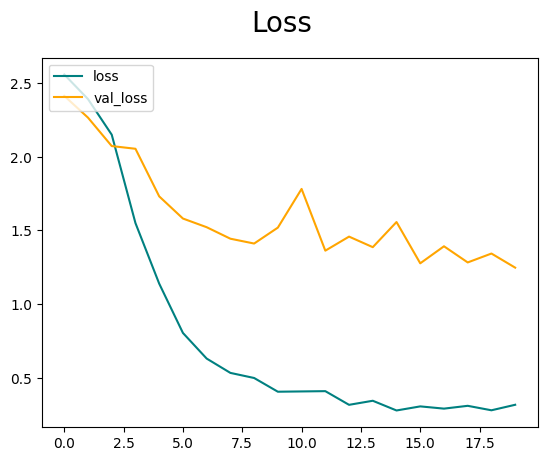

In [52]:
fig = plt.figure()
plt.plot(hist.history['loss'],color= 'teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

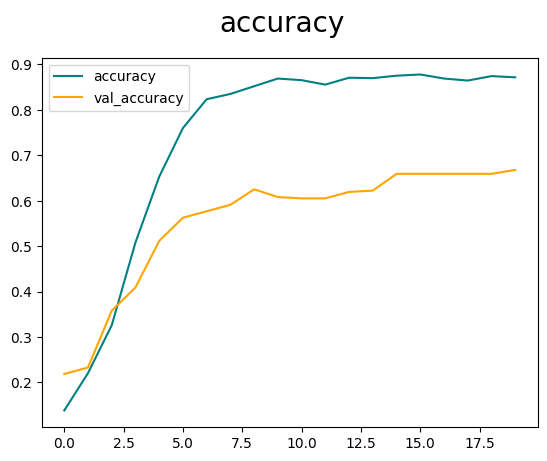

In [53]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color= 'teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('accuracy', fontsize= 20)
plt.legend(loc='upper left')
plt.show()

# 4 Evaluate Performance

## 4.1 Evaluate

In [54]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [56]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [57]:
len(test)

5

In [62]:
from tensorflow.keras.utils import to_categorical
# Initialize metrics for multi-class classification
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

# Iterate over the test dataset
for batch in test.as_numpy_iterator(): 
    X, y_true = batch
    y_pred = model.predict(X)
    
    # Perform one-hot encoding on true labels
    y_true_one_hot = to_categorical(y_true, num_classes=13)
    
    # Update metrics
    pre.update_state(y_true_one_hot, y_pred)
    re.update_state(y_true_one_hot, y_pred)
    acc.update_state(y_true_one_hot, y_pred)

# Compute and print the final results
print("Precision:", pre.result().numpy())
print("Recall:", re.result().numpy())
print("Accuracy:", acc.result().numpy())

2024-05-09 11:02:30.109674: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 11:02:30.117548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 11:02:30.229718: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 11:02:30.303997: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 11:02:30.432366: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: profile 'ICC Profile': 0h: PCS illuminant is not D50
2024-05-09 11:02:30.454522: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 11:02:30.531308: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-05-09 11:02:31.271743: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-05-09 11:02:31

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step
Precision: 0.7009346
Recall: 0.5244755
Accuracy: 0.6013986


2024-05-09 11:02:33.161524: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


#before augmenation test accuracy = Accuracy: 0.6013986


## 4.2 Test

In [74]:
import cv2

#### bacterial disease test

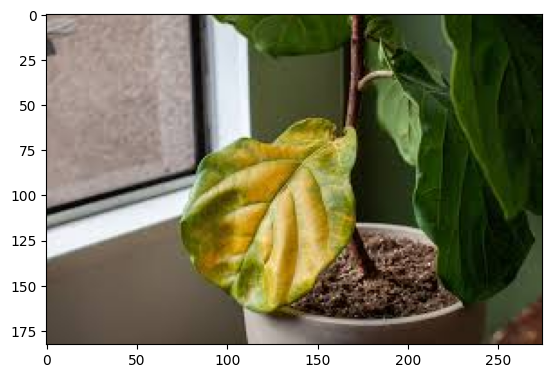

In [64]:
img = cv2.imread('/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/plant_disease_classification_dataset_rupa/bacterial disease/test.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

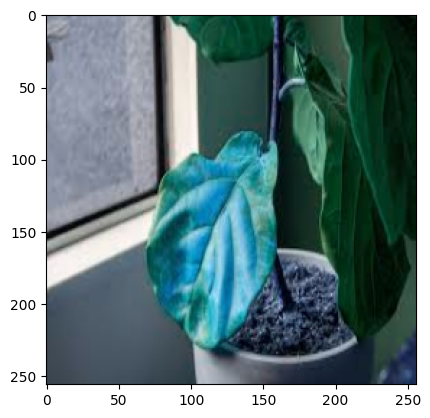

In [65]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [66]:
# Preprocess the resized image
resize_normalized = resize / 255.0  # Normalize pixel values
resize_normalized = np.expand_dims(resize_normalized, axis=0)  # Add batch dimension


In [67]:
predictions = model.predict(resize_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step


In [68]:
predicted_class_index = np.argmax(predictions, axis=1)[0]

In [71]:
class_labels = ['nematode disease',
 'potassium deficiency',
 'phosphorus deficiency',
 'fungal disease',
 'Magnesium Deficiency',
 'parasitic disease',
 'Iron Deficiency',
 'viral disease',
 'nitrogen deficiency',
 'calcium deficiency',
 'no_disease',
 'sulfur deficiency',
 'bacterial disease']
 

In [72]:
predicted_class_label = class_labels[predicted_class_index]

In [73]:
print('The plant has', predicted_class_label)

The plant has parasitic disease


provides wrong answer

In [74]:
print('Probabilities for all classes:')
for i, prob in enumerate(predictions[0]):
    print(f'Class{i + 1}: {prob:.4f}')

Probabilities for all classes:
Class1: 0.0031
Class2: 0.0012
Class3: 0.0772
Class4: 0.0028
Class5: 0.0662
Class6: 0.7579
Class7: 0.0175
Class8: 0.0024
Class9: 0.0219
Class10: 0.0355
Class11: 0.0050
Class12: 0.0041
Class13: 0.0051


### fungal disease test

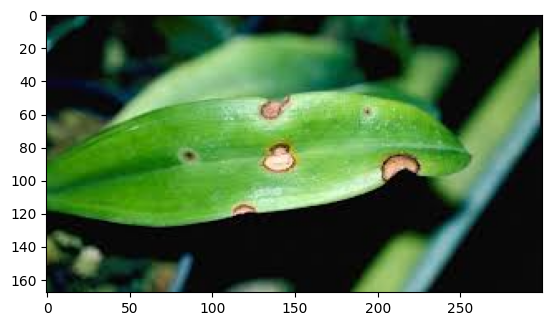

In [75]:
img1 = cv2.imread('/Users/sadiakhanrupa/Bootcamp Main Phase/dataset_final_project/plant_disease_classification_dataset_rupa/fungal disease/test.jpeg')
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.show()

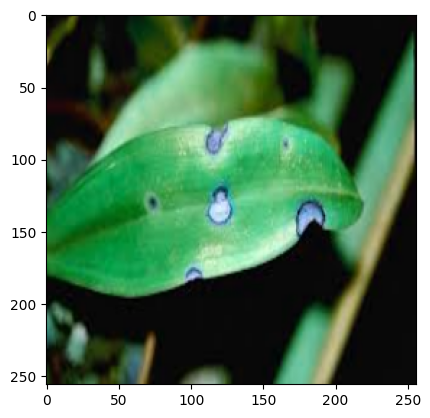

In [76]:
resize1 = tf.image.resize(img1,(256,256))
plt.imshow(resize1.numpy().astype(int))
plt.show()

In [77]:
# Preprocess the resized image
resize_normalized = resize1 / 255.0  # Normalize pixel values
resize_normalized = np.expand_dims(resize_normalized, axis=0)  # Add batch dimension


In [78]:
prediction_new = model.predict(resize_normalized)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [79]:
predicted_class_index = np.argmax(prediction_new, axis=1)[0]

In [80]:
predicted_class_label = class_labels[predicted_class_index]

In [81]:
print('The plant has ', predicted_class_label)

The plant has  calcium deficiency


# 5.Save the model

In [108]:
from tensorflow.keras.models import load_model

In [109]:
model.save(os.path.join('models','mutil_class_classification_model.h5'))

In [110]:
new_model = load_model(os.path.join('models','mutil_class_classification_model.h5'))